In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import optimize
from scipy import interpolate

In [2]:
data = np.loadtxt('HoverH0.dat', skiprows=1, unpack=True)

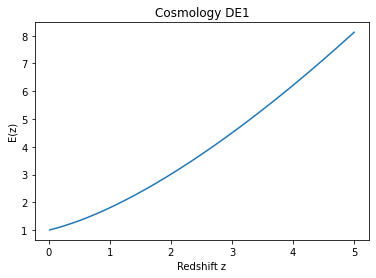

In [3]:
plt.figure()
plt.title('Cosmology DE1')
plt.xlabel('Redshift z')
plt.ylabel('E(z)')
plt.plot(data[0], data[2])
plt.show()

Interpolation of E(z) for use later on 

In [4]:
EofZ = [None]*(len(data)-1)
for i in range(1, len(data)):
	EofZ[i-1] = interpolate.interp1d(data[0], data[i], 'cubic')

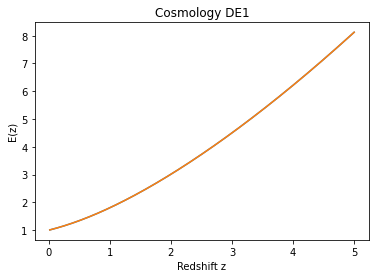

In [5]:
plt.figure()
plt.title('Cosmology DE1')
plt.xlabel('Redshift z')
plt.ylabel('E(z)')
plt.plot(data[0], data[2])
plt.plot(data[0], EofZ[1](data[0]))
plt.show()

# Distances

# Comoving distance
Trapezoidal rule is used for the integration
$$\int_{0}^{z}\frac{cdz}{H(z)} = \frac{c}{H_{0}} \int_{0}^{z}\frac{dz}{E(z)}$$

In [6]:
integral = [None] * (len(data)-1)
for i in range(1, len(data)):
	integral[i-1] = integrate.cumtrapz(1.0 / data[i], data[0], initial=0) * 4282.7494 #4062228428.184282 # Times value of Hubble distance

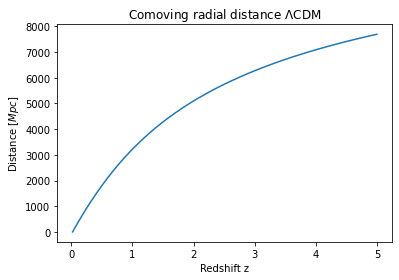

In [7]:
comoving = integral
plt.figure()
plt.title('Comoving radial distance $\Lambda$CDM')
plt.xlabel('Redshift z')
plt.ylabel('Distance [$Mpc$]')
plt.plot(data[0], comoving[0])
plt.show()

## Luminosity distance

In [8]:
luminosity = [None] * (len(data)-1)
for i in range(1, len(data)):
	luminosity[i-1] = (1 + data[0]) * integral[i-1]

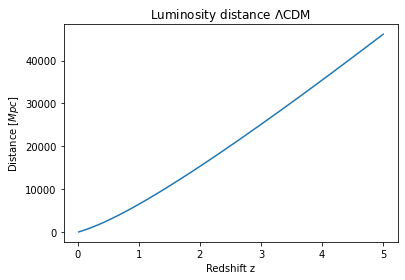

In [9]:
plt.figure()
plt.title('Luminosity distance $\Lambda$CDM')
plt.xlabel('Redshift z')
plt.ylabel('Distance [$Mpc$]')
plt.plot(data[0], luminosity[0])
plt.show()

## Angular distance

In [10]:
angular = [None] * (len(data)-1)
for i in range(1, len(data)):
	angular[i-1] = integral[i-1] / (1 + data[0])

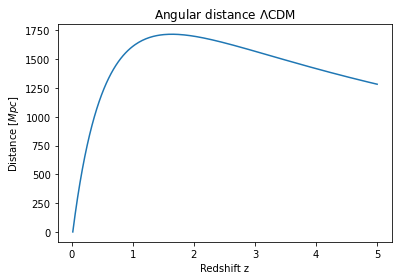

In [11]:
plt.figure()
plt.title('Angular distance $\Lambda$CDM')
plt.xlabel('Redshift z')
plt.ylabel('Distance [$Mpc$]')
plt.plot(data[0], angular[0])
plt.show()

## Diameter distance

In [12]:
k = [0, 0, 0, 0, 0, 0, 0, 0]
diameter = [None] * (len(data)-1)
for i in range(1, len(data)):
	if k[i - 1] == 1:
		diameter[i-1] = np.sin(comoving[i-1])
	elif k[i - 1] == 0:
		diameter[i-1] = comoving[i-1]
	elif k[i - 1] == -1:
		diameter[i-1] = np.sinh(comoving[i-1])

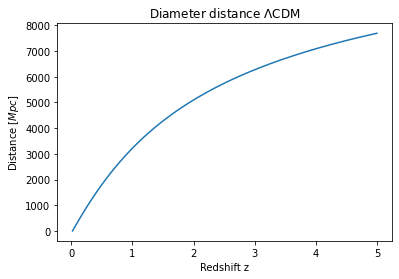

In [13]:
plt.figure()
plt.title('Diameter distance $\Lambda$CDM')
plt.xlabel('Redshift z')
plt.ylabel('Distance [$Mpc$]')
plt.plot(data[0], diameter[0])
plt.show()

Putting them all together

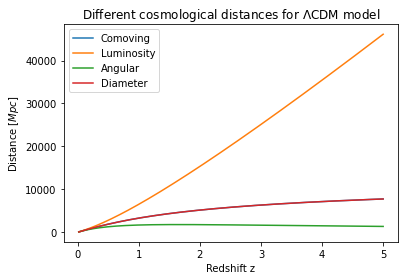

In [14]:
plt.figure()
plt.title('Different cosmological distances for $\Lambda$CDM model')
plt.plot(data[0], comoving[0], label='Comoving')
plt.plot(data[0], luminosity[0], label='Luminosity')
plt.plot(data[0], angular[0], label='Angular')
plt.plot(data[0], diameter[0], label='Diameter')
plt.xlabel('Redshift z')
plt.ylabel('Distance [$Mpc$]')
plt.legend()
plt.savefig('Report/Graphs/cosmoDistances.png')
plt.show()

# Volume

In [15]:
omega = 24 * np.pi / 180
volume = [None] * (len(data)-1)
for i in range(1, len(data)):
	volume[i-1] = integrate.cumtrapz(diameter[i-1]**2 / data[i-1], data[0], initial=0) * omega**2 * 4282.7494**3

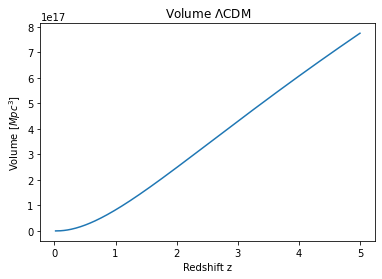

In [16]:
plt.figure()
plt.title('Volume $\Lambda$CDM')
plt.xlabel('Redshift z')
plt.ylabel('Volume [$Mpc^{3}$]')
plt.plot(data[0], volume[0])
plt.savefig('Report/Graphs/volumeLCDM.png')
plt.show()

## Volume as a function of $z_{final}$ and $z_{initial}$

In [17]:
zFinal = data[0]
zInitial = data[0]

X, Y = np.meshgrid(zFinal, zInitial)

Z = X.copy()

for i in range(len(Z)):
	for b in range(len(Z[i])):
		if i > b:
			Z[i][b] = np.sum(volume[0][b:i])
		else:
			Z[i][b] = np.nan

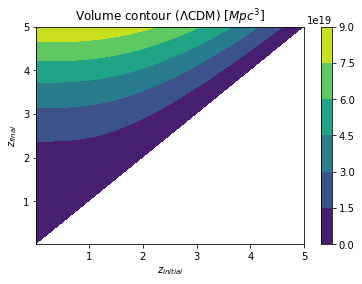

In [18]:
plt.figure()
plt.xlabel('$z_{initial}$')
plt.ylabel('$z_{final}$')
plt.title('Volume contour ($\Lambda$CDM) [$Mpc^{3}$]')
plt.contourf(X, Y, Z)
plt.colorbar()
plt.savefig('Report/Graphs/volContour.png')
plt.show()

# Flux

In [19]:
L = np.arange(1, 11) * 1e44
flux = [None] * (len(data)-1)
for i in range(1, len(data)):
	flux[i-1] = [None]*len(L)
	for b in range(len(L)):
		flux[i-1][b] = L[b] / (4 * np.pi * (luminosity[i-1] * 3.086e24)**2) #Convert megaparsec squared to cm squared

C:\Users\Carlos\AppData\Local\Temp/ipykernel_19916/883595202.py:6: RuntimeWarning: divide by zero encountered in true_divide
  flux[i-1][b] = L[b] / (4 * np.pi * (luminosity[i-1] * 3.086e24)**2) #Convert megaparsec squared to cm squared


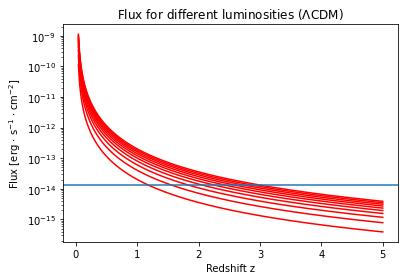

In [20]:
flim = 1.3e-14
plt.figure()
plt.title('Flux for different luminosities ($\Lambda$CDM)')
plt.xlabel('Redshift z')
plt.ylabel('Flux [erg $\cdot$ s$^{-1}$ $\cdot$ cm$^{-2}$]')
for i in range(len(flux[0])):
	plt.semilogy(data[0], flux[0][i], c='red')
plt.axhline(flim)
plt.show()

Interpolation to find the intersections with $F_{min}$

In [21]:
params = [None]*(len(data)-1)
for i in range(1, len(data)):
	params[i-1] = [None]*len(L)
	for b in range(len(L)):
		params[i-1][b] = interpolate.interp1d(np.log10(flux[i-1][b][1:]), data[0][1:], 'cubic')

In [22]:
zMax = [None]*len(params)
for i in range(len(zMax)):
	zMax[i] = [None]*len(L)
	for b in range(len(L)):
		zMax[i][b] = (params[i][b](np.log10(flim)))

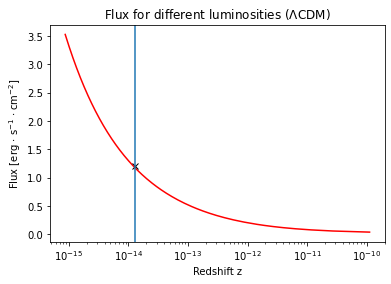

In [23]:
plt.figure()
plt.title('Flux for different luminosities ($\Lambda$CDM)')
plt.xlabel('Redshift z')
plt.ylabel('Flux [erg $\cdot$ s$^{-1}$ $\cdot$ cm$^{-2}$]')
plt.semilogx(flux[2][0][:-75], data[0][:-75], c='red')
plt.plot(flim, zMax[1][0], 'x', c='black')
plt.axvline(flim)
plt.show()


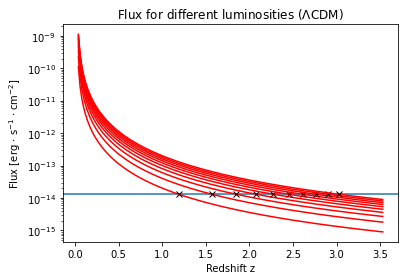

In [24]:
plt.figure()
plt.title('Flux for different luminosities ($\Lambda$CDM)')
plt.xlabel('Redshift z')
plt.ylabel('Flux [erg $\cdot$ s$^{-1}$ $\cdot$ cm$^{-2}$]')
plt.axhline(flim)
for i in range(len(flux[2])):
	plt.semilogy(data[0][:-75], flux[0][i][:-75], c='red')
	plt.plot(zMax[0][i], flim, 'x', c='black')
plt.savefig('Report/Graphs/fluxZmax.png')
plt.show()

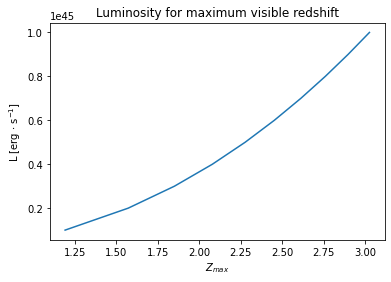

In [25]:
plt.figure()
plt.title('Luminosity for maximum visible redshift')
plt.xlabel('$Z_{max}$')
plt.ylabel('L [erg $\cdot$ s$^{-1}$]')
plt.plot(zMax[0], L)
plt.savefig('Report/Graphs/luminosityZmax.png')
plt.show()

### M relation

In [26]:
m500 = [None] * (len(data)-1)
for i in range(1, len(data)):
	m500[i-1] = [None]*len(zMax[i-1])
	for b in range(len(zMax)):
		m500[i-1][b] = (L[b] / (((0.70/0.72)**-0.39) * np.exp(101.483) * EofZ[i-1](zMax[i-1][b])**1.85))**(1/1.61) * 3.9e14

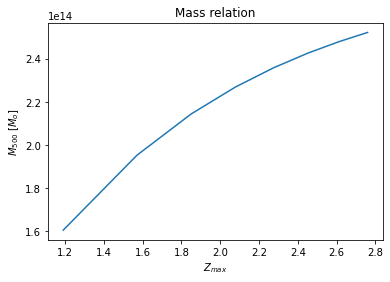

In [27]:
plt.figure()
plt.title('Mass relation')
plt.xlabel('$Z_{max}$')
plt.ylabel('$M_{500}$ [$M_{o}$]')
plt.plot(zMax[0], m500[0])
plt.savefig('Report/Graphs/massZmax.png')
plt.show()

## Power Spectrum

In [28]:
power = np.loadtxt('Planck+_matterpower.dat', skiprows=0, unpack=True)

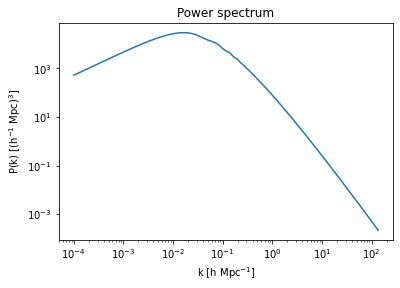

In [29]:
plt.figure()
plt.title('Power spectrum')
plt.xlabel('k [h Mpc$^{-1}$]')
plt.ylabel('P(k) [(h$^{-1}$ Mpc)$^{3}$]')
plt.loglog(power[0], power[1])
plt.savefig('Report/Graphs/powerSpectrum.png')
plt.show()

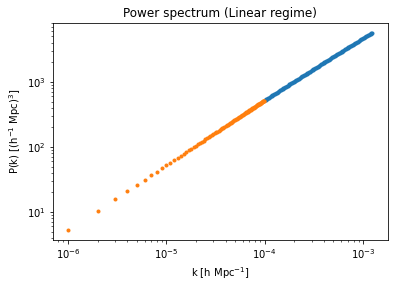

In [30]:
kto0 = np.linspace(0, power[0][0], 100, endpoint=False)
linPower = interpolate.interp1d([0, power[0][0]], [0, power[1][0]], 'linear', fill_value='extrapolate')
plt.figure()
plt.title('Power spectrum (Linear regime)')
plt.xlabel('k [h Mpc$^{-1}$]')
plt.ylabel('P(k) [(h$^{-1}$ Mpc)$^{3}$]')
plt.loglog(power[0][:-580], power[1][:-580], '.')
plt.loglog(kto0, linPower(kto0), '.')
plt.savefig('Report/Graphs/powerLinear.png')
plt.show()

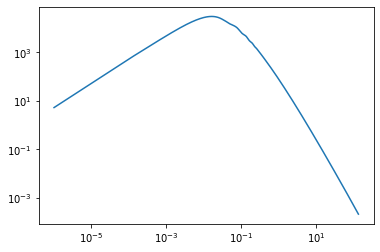

In [31]:
plt.figure()
fullPower = [np.append(kto0[1:], power[0]), np.append(linPower(kto0)[1:], power[1])]
plt.loglog(fullPower[0], fullPower[1])
plt.show()

Defining the window function

In [32]:
def w(x):
	return (3/np.power(x, 3))*(np.sin(x) - x * np.cos(x))

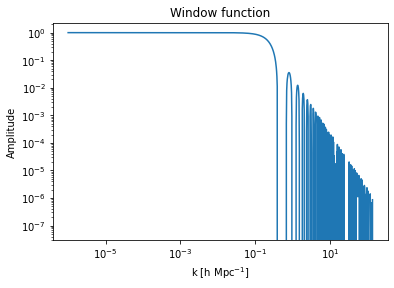

In [33]:
window = w(fullPower[0]*11.4286)
plt.figure()
plt.title('Window function')
plt.xlabel('k [h Mpc$^{-1}$]')
plt.ylabel('Amplitude')
plt.loglog(fullPower[0], window)
plt.savefig('Report/Graphs/windowFunction.png')
plt.show()

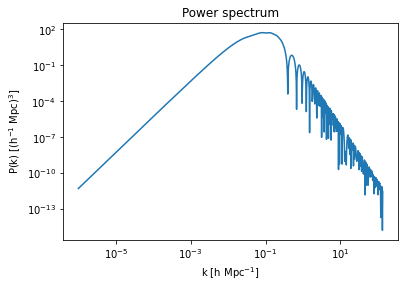

In [34]:
plt.figure()
plt.title('Power spectrum')
plt.xlabel('k [h Mpc$^{-1}$]')
plt.ylabel('P(k) [(h$^{-1}$ Mpc)$^{3}$]')
plt.loglog(fullPower[0], window**2 * fullPower[1] * fullPower[0]**2)
plt.show()

Calculate integral to find normalization factor such that $\sigma_{8} = 0.82$

In [35]:
sigma = np.sqrt(integrate.trapz(window**2 * fullPower[1] * fullPower[0]**2)) / (2*np.pi)
normFactor = 0.82 / sigma
sigma8 = sigma * normFactor
print(sigma8)
print(normFactor)

0.82
0.0746932423679621


Load g() for different cosmologies

In [36]:
g = np.loadtxt('gf.dat', skiprows=0, unpack=True)
DValues = [None]*len(g)
DValues[0] = g[0]
for i in range(len(DValues)-1):
	DValues[i+1] = g[i+1] / (1 + g[0])

Creating the $\sigma$ as a function of $R$, using ($z=0$)

In [37]:
RValues = np.arange(0.0, 15.0, 0.01)
sigmaSquared = list(normFactor*normFactor*integrate.trapz(w(fullPower[0]*RValues[i])**2 * fullPower[1] * fullPower[0]**2) / (4*np.pi**2) for i in range(len(RValues)))

C:\Users\Carlos\AppData\Local\Temp/ipykernel_19916/1000162595.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return (3/np.power(x, 3))*(np.sin(x) - x * np.cos(x))
C:\Users\Carlos\AppData\Local\Temp/ipykernel_19916/1000162595.py:2: RuntimeWarning: invalid value encountered in multiply
  return (3/np.power(x, 3))*(np.sin(x) - x * np.cos(x))


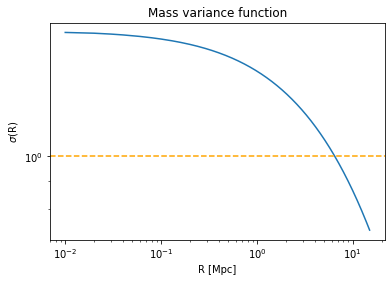

In [38]:
plt.figure()
plt.title('Mass variance function')
plt.ylabel('$\sigma$(R)')
plt.xlabel('R [Mpc]')
plt.loglog(RValues, np.sqrt(sigmaSquared))
plt.axhline(1, color='orange', linestyle='--')
plt.savefig('Report/Graphs/massVariance.png')
plt.show()

Plotting as a function of M

In [39]:
rhobar = 0.04 * 2.7754e11
MValues = (4 * np.pi * rhobar * RValues**3) / 3

In [40]:
numRedshifts = int(len(DValues[1])/15)
sigmaZ = [None]*numRedshifts
for i in range(numRedshifts):
	sigmaZ[i] = DValues[1][i] * np.sqrt(sigmaSquared)

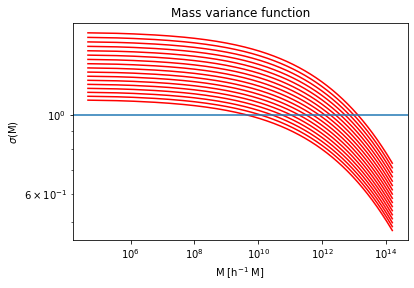

In [41]:
plt.figure()
plt.title('Mass variance function')
plt.ylabel('$\sigma$(M)')
plt.xlabel('M [h$^{-1}$ M]')
for i in range(numRedshifts):
	plt.loglog(MValues, sigmaZ[i], c='red')
plt.axhline(1)
plt.show()

In [42]:
paramsMass = [None]*(len(DValues)-1)
for i in range(1, len(data)):
	paramsMass[i-1] = [None]*numRedshifts
	for b in range(numRedshifts):
		paramsMass[i-1][b] = interpolate.interp1d(np.log10(sigmaZ[b][1:]), MValues[1:], 'cubic')

In [43]:
MNL = [None]*len(paramsMass)
for i in range(len(MNL)):
	MNL[i] = [None]*numRedshifts
	for b in range(numRedshifts):
		MNL[i][b] = (paramsMass[i][b](np.log10(1)))

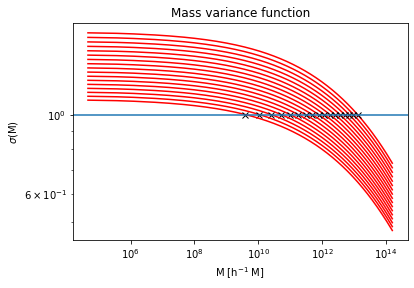

In [44]:
plt.figure()
plt.title('Mass variance function')
plt.ylabel('$\sigma$(M)')
plt.xlabel('M [h$^{-1}$ M]')
for i in range(numRedshifts):
	plt.loglog(MValues, sigmaZ[i], c='red')
	plt.loglog(MNL[0][i], 1, 'x', c='black')
plt.axhline(1)
plt.savefig('Report/Graphs/varianceMNL.png')
plt.show()

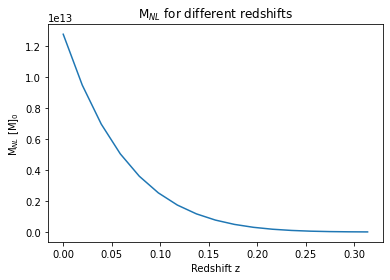

In [45]:
plt.figure()
plt.title('M$_{NL}$ for different redshifts')
plt.xlabel('Redshift z')
plt.ylabel('M$_{NL}$ [M]$_{0}$')
plt.plot(DValues[0][:numRedshifts], MNL[0])
plt.savefig('Report/Graphs/mnlRedshift.png')
plt.show()

# Deducing counts

In [46]:
RValues = np.arange(0.1, 15.0, 0.1)
sigmaSquared = list(normFactor*normFactor*integrate.trapz(w(fullPower[0]*RValues[i])**2 * fullPower[1] * fullPower[0]**2) / (4*np.pi**2) for i in range(len(RValues)))

In [47]:
rhobar = 0.04 * 2.7754e11
MValues = (4 * np.pi * rhobar * RValues**3) / 3

Differential

In [48]:
derivative = np.gradient(np.log(sigmaSquared), np.log(MValues))

### Defining multiplicity function

In [49]:
def f(nu):
	res = np.exp(-(nu**2)/2) * nu
	res *= np.sqrt(2/np.pi)
	return res

Calculating $\Phi(M)$

In [50]:
delta = (2.7754e11 - rhobar) / rhobar
phi = (2.7754e11/MValues**2) * (-derivative/2) * f(1.686 / np.sqrt(sigmaSquared))

Volume Integral for an angle of 24°

In [51]:
omega = 24 * np.pi / 180
volumeInt = [None] * (len(data)-1)
for i in range(1, len(data)):
	volumeInt[i-1] = integrate.cumtrapz(diameter[i-1]**2 / data[i-1], data[0], initial=0) * omega**2 * 3**3

Mass Integral

In [52]:
massInt = integrate.cumtrapz(phi, MValues, initial=0)

In [53]:
print((massInt[-1] - massInt[60]) * (volumeInt[0][-1] - volumeInt[0][60]))

173925.94473609142
